# Project: We Rate Dogs 
#### Data Wrangling and Analyzing
#### Presented By: Ali Hasan
#### Date: 11/22/2018

# Introduction

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources regarding one of Twitter accounts (We Rate Dogs)and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. That's the first part.
Second part would be to merge all datasets in one master dataset then conduct different types of analyses and visualiziation.
Third part will be consisted of two PDFs. One for the Data Warngling efforts and the second one for Analyses and Visulizations





## First Part - Data Wrangling 
  #### - Gathering Data
    - Download CSV file
    - Create a TSV file from URL
    - Download Twitter API and JSON 
  #### - Assessing Data 
    - Quality
    - Tidiness 
  #### - Cleaning Data
## Second Part - Storing, Analyzing, and Visualizing Wrangled Data
## Third Part - Reporting on:
    - Wrangling Efforts
    - Data Analyses and Visualizations


In [133]:
# Import all required libraries
import pandas as pd
import json 
import requests 
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import random
import matplotlib
%matplotlib inline
import seaborn as sns
import time

## First Part - Data Wrangling 

### Gathering Data

#### Download CSV file twitter_archive.csv

In [2]:
# Read downloaded twitter archive CSV
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Create a TSV file from URL 

In [3]:
# download url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


# Open tsv and write contents
with open('image.tsv', mode ='wb') as file:
    file.write(response.content)

# Read TSV file
image = pd.read_csv('image.tsv', sep='\t' )
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Download Twitter API and JSON

In [4]:
# Tweeter API Developer Credentials 
import tweepy

consumer_key = 'R4l3JLU7i3jiEyvzmji6DLAj0'
consumer_secret = 'ecp6uYvKa7ankFTUNTTBUXf2fb4XNODQzmkt6Vc7wRoOjQecu3'
access_token = '1061800277378981888-lgTwRZJyDDnQ2VegCRlRVA2lW8x9MN'
access_secret = 'wR7fMnT1wCYut3b7P1QZHQ37pY8lQUkUdtuersUTOmpeY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
#Twitter Query using tweet_id information from the twitter_archive CSV file.

tweet_ids = list(twitter_archive.tweet_id)

tweet_data = {}
error_list = []
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for tweet_id: " + str(tweet))
        error_list.append(tweet)
        

Error for tweet_id: 888202515573088257
Error for tweet_id: 873697596434513921
Error for tweet_id: 872668790621863937
Error for tweet_id: 869988702071779329
Error for tweet_id: 866816280283807744
Error for tweet_id: 861769973181624320
Error for tweet_id: 845459076796616705
Error for tweet_id: 842892208864923648
Error for tweet_id: 837012587749474308
Error for tweet_id: 827228250799742977
Error for tweet_id: 802247111496568832
Error for tweet_id: 775096608509886464
Error for tweet_id: 770743923962707968
Rate limit reached. Sleeping for: 733
Error for tweet_id: 754011816964026368
Rate limit reached. Sleeping for: 734


In [9]:
# size of dataframe
print("The number of tweed_ids is", len(tweet_data.keys()))
# The number of the errors
print("The number of tweet_ids with error is", len(error_list))

The number of tweed_ids is 2342
The number of tweet_ids with error is 14


In [10]:
# Write JSON in a text file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, sort_keys = True, indent=4, ensure_ascii = False)
# Read the new JSON file
twitter_api = pd.read_json('tweet_json.txt',orient='index')
twitter_api.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2544,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


### Assessing Data 

 Intial assessing for the three file visual and programatic:

In [11]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# Get Data info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Get summary of our quantative data
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
# Get Data info
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Get summary of our quantative data
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
twitter_api

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2544,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,132,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1209,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,841,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,432,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,244,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,294,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href=""htt

In [18]:
# Get Data info
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [19]:
# Get summary of our quantative data
twitter_api.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2342.000000,2342.0,0.0,2.342000e+03,2.342000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2342.000000,2206.0,2206.0,2.600000e+01,2.600000e+01,2342.000000,2342.0,2342.000000
mean,NaN,NaN,8000.126388,0.0,NaN,7.422212e+17,7.422212e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013237,0.0,0.0,8.113972e+17,8.113972e+17,2950.495303,0.0,0.105465
std,NaN,NaN,12382.293537,0.0,NaN,6.832408e+16,6.832408e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114311,0.0,0.0,6.295843e+16,6.295843e+16,4962.148408,0.0,0.307218
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1382.750000,0.0,NaN,6.783509e+17,6.783509e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,592.500000,0.0,0.000000
50%,NaN,NaN,3483.000000,0.0,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1377.000000,0.0,0.000000
75%,NaN,NaN,9802.750000,0.0,NaN,7.986971e+17,7.986971e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3442.250000,0.0,0.000000
max,NaN,NaN,164933.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,84082.000000,0.0,1.000000



#### Quality

twitter_archive

- As per project instructions, we need to exclude 181 retweets from our table
- Name column has got incosistent value and NA need to be removed
- Rating numerator and denominator inconsistent values to be corrected
- Timestamp format to be datetime format. Then split it into three columns year, month, and day
- One thing more I found out I needed to do, make sure that "None" in dogs stages is programmable


image 

- Drop records with duplicated jpg_url
- p1,p2 and p3 have inconsisitent upper case
- Replace underscore by space in p1, p2, p3 values
- Create one column for immage prediction and one column for confidence level

twitter_api

- Rename the id column to tweet_id 
- 168 records have a retweeted_status which will need to be excluded



### Tidiness

twitter_archive
- Combine each dog stage column into a single column named "stage"
- Convert Rating columns to float values
- Remove columns that are not needed - All datasets

All datasets
- All datasets Convert tweet_id column from an integer to a string value
- Consolidate the 3 datasets into 1















### Cleaning Data

#### twitter_archive dataset

In [20]:
# Make copy for these 3 datasets
twitter_archive_clean = twitter_archive.copy()

#### Define
Retweets are not original tweets and need to be removed

#### Code 

In [21]:
# drop retweets values so they don't count
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.retweeted_status_id == twitter_archive_clean.retweeted_status_id].index, inplace=True)

#### Test

In [22]:
twitter_archive_clean.info()
twitter_archive_clean. shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

(2175, 17)

#### Define
Remove all retweet related columns

#### Code

In [23]:
# Remove retweets related columns
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

#### Test

In [24]:
twitter_archive_clean.info()
twitter_archive_clean. shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


(2175, 14)

#### Define
Name change to be verified

#### Code

In [25]:
# Name column errors
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [26]:
# Name consistency
for name in twitter_archive_clean.name:
    if name.islower():
        twitter_archive_clean.name.replace(name, 'None', inplace = True)
twitter_archive_clean.name = twitter_archive_clean.name.replace('O', 'None')

#### Test

In [27]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

#### Define
Correct NA values in the name column

#### Code

In [28]:
twitter_archive_clean.name = twitter_archive_clean.name.apply(lambda x: x if x != 'None' else np.nan)

#### Test

In [29]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


#### Define
Rating numerator and denominator from integer to decimal

#### Code

In [30]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1390 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 254.9+ KB


#### Define
Timestamp coversion to datetime format then split into three columns year, month, and day

#### Code

In [32]:
# Change timestamp to datetime formart
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#### Test

In [33]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day']

#### image dataset

In [34]:
image_clean = image.copy()


#### Define
Drop duplicated records with same jpg_url

#### Code

In [35]:
## Duplicated jpg_url
sum(image.jpg_url.duplicated())

66

In [36]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [37]:
sum(image_clean['jpg_url'].duplicated())

0

#### Define
p1,p2 and p3 have inconsisitent upper case

In [38]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test

In [39]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define 
Replace underscore by space in p1, p2, p3 values

#### Code

In [40]:
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

#### Test

In [41]:
image_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define
Create one column for immage prediction and one column for confidence level

#### Code

In [42]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_clean):
    if image_clean['p1_dog'] == True:
        dog_type.append(image_clean['p1'])
        confidence_list.append(image_clean['p1_conf'])
    elif image_clean['p2_dog'] == True:
        dog_type.append(image_clean['p2'])
        confidence_list.append(image_clean['p2_conf'])
    elif image_clean['p3_dog'] == True:
        dog_type.append(image_clean['p3'])
        confidence_list.append(image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# series objects having index the image_prediction_clean column.        
image_clean.apply(image, axis=1)

# create new columns
image_clean['dog_type'] = dog_type
image_clean['confidence_list'] = confidence_list

In [43]:
#drop rows that has prediction_list 'error'
image_clean = image_clean[image_clean['dog_type'] != 'Error']

#### Test

In [44]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### twitter_api


In [45]:
twitter_api_clean = twitter_api.copy()

#### Define
Rename the id column to tweet_id 

#### Code

In [46]:
twitter_api_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [47]:
list(twitter_api_clean)

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

In [48]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
tweet_id                         2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23


#### Define
168 records have a retweeted_status which will need to be excluded

#### Code

In [49]:
# find tweet_id with valid retweeted_status 
twitter_api_clean[twitter_api_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,134,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2245,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1058,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3104,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,18086,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3130,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6254,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-

In [50]:
twitter_api_clean.drop(twitter_api_clean[twitter_api_clean['retweeted_status'].notnull()== True].index,inplace=True)

#### Test

In [51]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
tweet_id                         2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

### Tidiness


#### Define
Remove unwanted columns from all datasets

#### Code
To do that, I need to pull all datasets.info() and verify what column to keep and what column to remove before merging all three datasets together


In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1390 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
year                     2175 non-null int64
month                    2175 non-null int64
day                      2175 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 288.9+ KB


In [53]:
# Delete unwanted columns from twitter_archive_clean
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'expanded_urls'], 1)

#### Test

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1390 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 220.9+ KB


In [55]:
# Remove unwanted columns in the image dataset
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### Code

In [56]:
#Delete columns
image_clean = image_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test

In [57]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In [58]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
tweet_id                         2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

#### Code

In [59]:
# Keep a few columns from twitter_api_clean and delete the rest
twitter_api_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

#### Test

In [60]:
twitter_api_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2544,666020888022790144,508,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,129,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,125,666033412701032448,44,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,296,666044226329800704,139,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,107,666049248165822464,40,Here we have a 1949 1st generation vulpix. Enj...


#### Define
Twitter_archive - Combine each dog stage column into a single column named "stage"

#### code

In [61]:
# Combine dogs 4 stage columns into one column 'stage' list
# append each stage list into a bigger list
stage = pd.melt(twitter_archive_clean, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', "pupper", "puppo"])
stage_list = []
for ids in stage.tweet_id.unique():
    stage_list.append(stage.query('tweet_id == @ids').value.tolist())    

In [62]:
# remove repeat value in each stage list
stage_list2 = []
for e in stage_list:
    stage_list2.append(list(set(e)))        

In [63]:
# remove the 'None' in stage list which contains any stage value, such as 'doggo', 'floofer', "pupper", "puppo"
stage_list3 = []
for e in stage_list2:
    if len(e) > 1:
        e.remove('None')
        stage_list3.append(e)
    else:
        stage_list3.append(e)

In [64]:
# remove '[]' which wrapped outside the stage value
stage_list4 = []
for e in stage_list3:
    if len(e) > 1:
        stage_list4.append(",".join(e))
    else:
        stage_list4.append(e[0])

In [65]:
twitter_archive_clean['stage'] = stage_list4

#### Test

In [66]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,2017,8,1,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,2017,8,1,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,2017,7,31,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,2017,7,30,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,2017,7,29,None


In [67]:
twitter_archive_clean['stage'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
pupper,doggo       10
floofer             9
doggo,floofer       1
puppo,doggo         1
Name: stage, dtype: int64

#### Define
There are some dogs or tweet_id that has two stages. We need to find them

#### Code

In [68]:
# One floofer,doggo
twitter_archive_clean.query('stage == "floofer,doggo"')

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,stage


In [69]:
# One puppo,doggo
twitter_archive_clean.query('stage == "puppo,doggo"')

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,stage
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,13.0,10.0,NaN,doggo,None,None,puppo,2017,4,22,"puppo,doggo"


In [70]:
# Ten doggo,pupper
twitter_archive_clean.query('stage == "doggo,pupper"').head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,stage


#### Define
All datasets Convert tweet_id column from an integer to a string value

#### Code

In [71]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype('str')

#### Test

In [72]:
type(twitter_archive_clean['tweet_id'].iloc[0]), type(image_clean['tweet_id'].iloc[0]), \
type(twitter_api_clean['tweet_id'].iloc[0])

(str, str, str)

#### Define
Twitter_archive - Convert Rating columns to float values

#### Code

In [73]:
# This step was done in the quality stage but I wanted to make sure it is float now
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [74]:
twitter_archive_clean['rating_numerator'].dtype, twitter_archive_clean['rating_denominator'].dtype

(dtype('float64'), dtype('float64'))

#### Define
Consolidate the 3 datasets into 1

#### Code

In [75]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive_clean, image_clean, on='tweet_id'), \
                                  twitter_api_clean, on = 'tweet_id')

#### Test

In [76]:
twitter_archive_master.head()

,tweet_id,text_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day,stage,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,text_y
0,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,2017,7,31,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,24670,4090,This is Archie. He is a rare Norwegian Pouncin...
1,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,2017,7,30,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador retriever,0.168086,41532,8505,This is Darla. She commenced a snooze mid meal...
2,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,2017,7,29,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,39725,9213,This is Franklin. He would like you to stop ca...
3,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,None,None,None,2017,7,29,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake bay retriever,0.425595,19938,3065,Here we have a majestic great white breaching ...
4,890729181411237888,When you watch your owner call another dog a g...,13.0,10.0,NaN,None,None,None,None,2017,7,28,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,64480,18570,When you watch your owner call another dog a g...


In [77]:
# I forgot to drop 'doggo', 'puppo', 'pupper', 'floofer' columns. I can implement it on the new dataset
twitter_archive_master.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis=1,inplace=True)

In [78]:
# Order the table by tweet_id then reset index accordingly
twitter_archive_master.sort_values('tweet_id', inplace=True)
twitter_archive_master= twitter_archive_master.set_index('tweet_id')

In [79]:
# add rating column
twitter_archive_master['rating'] = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator

In [80]:
twitter_archive_master.head()

,text_x,rating_numerator,rating_denominator,name,year,month,day,stage,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,text_y,rating
tweet_id,,,,,,,,,,,,,,,
666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,2015,11,15,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,129,47,This is a western brown Mitsubishi terrier. Up...,0.7
666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,2015,11,16,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,296,139,This is a purebred Piers Morgan. Loves to Netf...,0.6
666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,NaN,2015,11,16,None,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden retriever,0.00795896,294,141,My oh my. This is a rare blond Canadian terrie...,0.9
666058600524156928,Here is the Rand Paul of retrievers folks! He'...,8.0,10.0,NaN,2015,11,16,None,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature poodle,0.201493,111,57,Here is the Rand Paul of retrievers folks! He'...,0.8
666071193221509120,Here we have a northern speckled Rhododendron....,9.0,10.0,NaN,2015,11,16,None,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,gordon setter,0.503672,145,59,Here we have a northern speckled Rhododendron....,0.9


In [81]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 666029285002620928 to 891815181378084864
Data columns (total 15 columns):
text_x                1056 non-null object
rating_numerator      1056 non-null float64
rating_denominator    1056 non-null float64
name                  730 non-null object
year                  1056 non-null int64
month                 1056 non-null int64
day                   1056 non-null int64
stage                 1056 non-null object
jpg_url               1056 non-null object
dog_type              1056 non-null object
confidence_list       1056 non-null object
favorite_count        1056 non-null int64
retweet_count         1056 non-null int64
text_y                1056 non-null object
rating                1056 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 132.0+ KB


In [82]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,year,month,day,favorite_count,retweet_count,rating
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,11.379735,10.519886,2015.846591,7.145833,16.110795,7911.772727,2255.431818,1.081182
std,8.563492,7.219483,0.690592,4.077628,8.759344,10653.075588,3281.921062,0.282588
min,1.000000,2.000000,2015.000000,1.000000,1.000000,80.000000,12.000000,0.200000
25%,10.000000,10.000000,2015.000000,3.000000,8.000000,1755.000000,560.750000,1.000000
50%,11.000000,10.000000,2016.000000,7.000000,17.000000,3793.000000,1240.000000,1.100000
75%,12.000000,10.000000,2016.000000,11.000000,24.000000,9637.500000,2715.000000,1.200000
max,165.000000,150.000000,2017.000000,12.000000,31.000000,91088.000000,33954.000000,7.500000


In [83]:
twitter_archive_master.shape

(1056, 15)

### Late Quality issue correction
#### Define
One thing more I found out I needed to do, make sure that "None" in dogs stages is programmable.
Note this is a qaulity issue

#### Code

In [84]:
twitter_archive_master.stage = twitter_archive_master.stage.replace('None', np.nan)

#### Test

In [85]:
twitter_archive_master.head()

,text_x,rating_numerator,rating_denominator,name,year,month,day,stage,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,text_y,rating
tweet_id,,,,,,,,,,,,,,,
666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,NaN,2015,11,15,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,129,47,This is a western brown Mitsubishi terrier. Up...,0.7
666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,296,139,This is a purebred Piers Morgan. Loves to Netf...,0.6
666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden retriever,0.00795896,294,141,My oh my. This is a rare blond Canadian terrie...,0.9
666058600524156928,Here is the Rand Paul of retrievers folks! He'...,8.0,10.0,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature poodle,0.201493,111,57,Here is the Rand Paul of retrievers folks! He'...,0.8
666071193221509120,Here we have a northern speckled Rhododendron....,9.0,10.0,NaN,2015,11,16,NaN,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,gordon setter,0.503672,145,59,Here we have a northern speckled Rhododendron....,0.9


In [89]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 666029285002620928 to 891815181378084864
Data columns (total 15 columns):
text_x                1056 non-null object
rating_numerator      1056 non-null float64
rating_denominator    1056 non-null float64
name                  730 non-null object
year                  1056 non-null int64
month                 1056 non-null int64
day                   1056 non-null int64
stage                 164 non-null object
jpg_url               1056 non-null object
dog_type              1056 non-null object
confidence_list       1056 non-null object
favorite_count        1056 non-null int64
retweet_count         1056 non-null int64
text_y                1056 non-null object
rating                1056 non-null float64
dtypes: float64(3), int64(5), object(7)
memory usage: 132.0+ KB


## Second Part - Storing, Analyzing, and Visualizing Wrangled Data

### Storing Wrnagled Data

In [151]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Analyzing Wrnagled Data

#### First Analysis and Visualizing - Dogs Counts

In [91]:
# High counts of rated dogs are
twitter_archive_master['dog_type'].value_counts().head(10)

golden retriever            98
pembroke                    71
labrador retriever          64
chihuahua                   52
pug                         42
pomeranian                  28
toy poodle                  25
chow                        24
chesapeake bay retriever    22
cocker spaniel              21
Name: dog_type, dtype: int64

In [92]:
# Low counts of rated dogs are
twitter_archive_master['dog_type'].value_counts().tail(15)

komondor                   2
leonberg                   2
brabancon griffon          2
wire-haired fox terrier    2
afghan hound               1
standard schnauzer         1
black-and-tan coonhound    1
groenendael                1
clumber                    1
welsh springer spaniel     1
bluetick                   1
toy terrier                1
irish wolfhound            1
silky terrier              1
japanese spaniel           1
Name: dog_type, dtype: int64

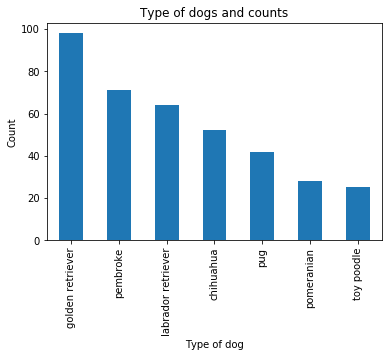

In [93]:
dog_type = twitter_archive_master.groupby('dog_type').filter(lambda x: len(x) >= 25)
dog_type['dog_type'].value_counts().plot(kind = 'bar')
plt.title('Type of dogs and counts')
plt.xlabel('Type of dog')
plt.ylabel('Count');

It seems like the Golden Retriver has the highest rating counts then pembroke the second. So it would make sense later when analyze the highly rated dogs to take the first 10 to be more accurate

#### Dogs Rating

In [153]:
top10_rating = twitter_archive_master.query('dog_type == dog_type').sort_values\
('rating', ascending = False)[1:10]
top10_rating = top10_rating['dog_type']
top10_rating


tweet_id
810984652412424192        golden retriever
778027034220126208                 clumber
820314633777061888           gordon setter
832273440279240704                pembroke
884441805382717440                pembroke
774314403806253056              eskimo dog
856282028240666624               chihuahua
807621403335917568        golden retriever
856526610513747968    old english sheepdog
Name: dog_type, dtype: object

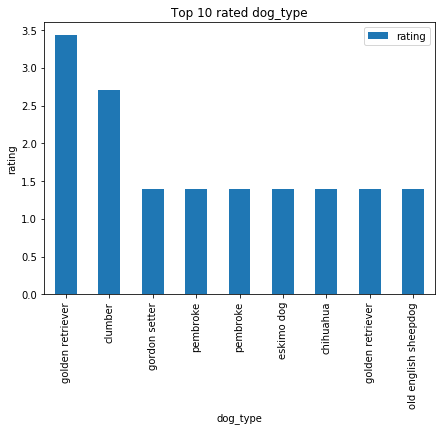

In [94]:
# Top 10 rated dog_type
top10_rating.plot(x='dog_type', y='rating',kind='bar',figsize=(7,5))
plt.title('Top 10 rated dog_type')
plt.xlabel('dog_type')
plt.ylabel('rating');

Here I wanted to verify whether the dogs that were rated in terms of counts, are getting high ratings too. 
Our conclusion was Golden Retriver, Dumbles, and Golden Setter are three highiest rate dogs while Golden Retriver,pembroke, and labrador retriever had the three highest counts

#### Second Analysis and Visualizing - Top 10 Rating Dogs' Names
Out of curiousity I wanted to know the names of these dogs

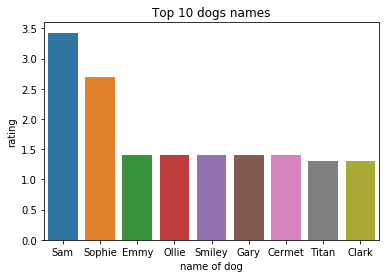

In [112]:
# Top 10 dog names
top10_rating = twitter_archive_master.query('name == name').sort_values('rating', ascending = False)[1:10]
sns.barplot(x="name", y="rating", data=top10_rating)
plt.title('Top 10 dogs names')
plt.xlabel('name of dog')
plt.ylabel('rating');

Sam, Sophie and Emmy are the names of these highly rated dogs

#### Third Analysis and Visualizing - Favorite vs Retweet Counts

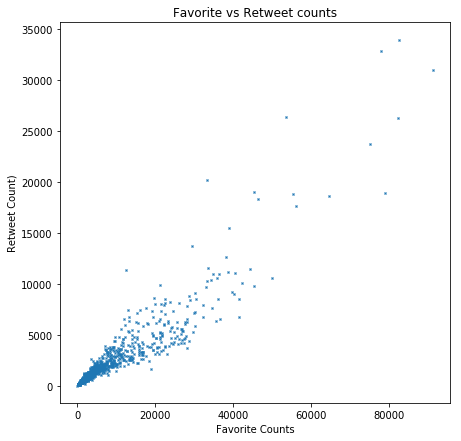

In [113]:
plt.figure(figsize = (7,7))
plt.plot(twitter_archive_master.favorite_count, twitter_archive_master.retweet_count,\
         marker='x', linestyle='', ms=2 );
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

Here I wanted to see the correlation between the counts of favorite and retweets. Seems like we have positive to strong positive correlation

#### Fourth Analysis and Visualizing - Averages of Dogs Stages

In [122]:
twitter_archive_master.stage.value_counts().index.tolist()

pupper           114
doggo             28
puppo             13
floofer            4
pupper,doggo       3
puppo,doggo        1
doggo,floofer      1
Name: stage, dtype: int64

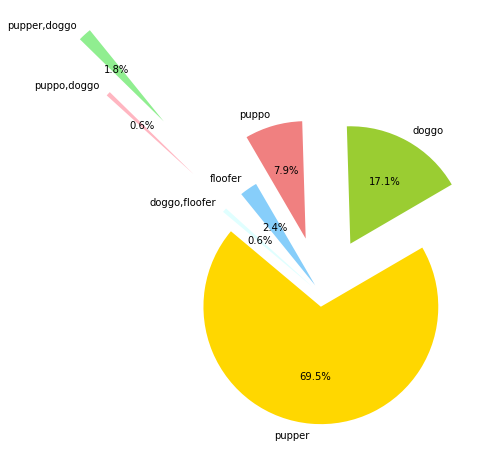

In [150]:
# exclude NA value first and then visualize the stage composition
labels = twitter_archive_master.stage.value_counts().index.tolist()
sizes = twitter_archive_master.stage.value_counts().tolist()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140)
 
plt.axis('equal');


Puppers represent almost 70% then doggos represent 17%

## Third Part - Reporting on:
    - Wrangling Efforts
    - Data Analyses and Visualizations

Both reports are attached in the submission file